In [ ]:
import numpy as np
import pandas as pd
import sklearn
import time
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import sys
import numpy
import os
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
numpy.set_printoptions(threshold=sys.maxsize)
import glob
import skimage.color
import skimage.filters
from skimage.morphology import opening, closing, erosion, dilation
from skimage.morphology import disk  # noqa
from skimage.color import rgb2lab

In [ ]:
pwd

'/content'

In [ ]:
cd drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
pwd

'/content/drive/MyDrive/Colab Notebooks'

In [ ]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "CNN images"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],  # minus 1 because 1,2,3,4
                                100*np.max(predictions_array),
                                class_names[true_label]), # minus 1 because 1,2,3,4
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(4))
  plt.yticks([])
  thisplot = plt.bar(range(4), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')



Epoch 1/70
118/118 [==============================] - 13s 10ms/step - loss: 1.1641 - accuracy: 0.4366 - val_loss: 1.0021 - val_accuracy: 0.5195
Epoch 2/70
118/118 [==============================] - 1s 9ms/step - loss: 0.8927 - accuracy: 0.5706 - val_loss: 0.7478 - val_accuracy: 0.6677
Epoch 3/70
118/118 [==============================] - 2s 14ms/step - loss: 0.7501 - accuracy: 0.6636 - val_loss: 0.6730 - val_accuracy: 0.7018
Epoch 4/70
118/118 [==============================] - 1s 9ms/step - loss: 0.6606 - accuracy: 0.7074 - val_loss: 0.6205 - val_accuracy: 0.7415
Epoch 5/70
118/118 [==============================] - 1s 12ms/step - loss: 0.6448 - accuracy: 0.7135 - val_loss: 0.5891 - val_accuracy: 0.7495
Epoch 6/70
118/118 [==============================] - 1s 9ms/step - loss: 0.5680 - accuracy: 0.7606 - val_loss: 0.5934 - val_accuracy: 0.7415
Epoch 7/70
118/118 [==============================] - 1s 11ms/step - loss: 0.5414 - accuracy: 0.7619 - val_loss: 0.5979 - val_accuracy: 0.7564
E

<ipython-input-7-32d466faa3cf>:71: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8,6))


51/51 - 0s - loss: 6.1149 - accuracy: 0.5976 - 233ms/epoch - 5ms/step
51/51 [==============================] - 0s 2ms/step
Saving figure Morphology Confusion matrix for 64 x 64 at 9_20 with four classes
                 precision    recall  f1-score   support

        rainfed       0.70      0.73      0.71       424
fully irrigated       0.72      0.70      0.71       399
percent deficit       0.50      0.52      0.51       404
     time delay       0.46      0.43      0.44       386

       accuracy                           0.60      1613
      macro avg       0.59      0.59      0.59      1613
   weighted avg       0.60      0.60      0.60      1613

Epoch 1/70
118/118 [==============================] - 6s 29ms/step - loss: 0.9681 - accuracy: 0.5767 - val_loss: 0.8950 - val_accuracy: 0.6138
Epoch 2/70
118/118 [==============================] - 2s 20ms/step - loss: 0.7674 - accuracy: 0.6798 - val_loss: 0.8615 - val_accuracy: 0.6379
Epoch 3/70
118/118 [==============================] 

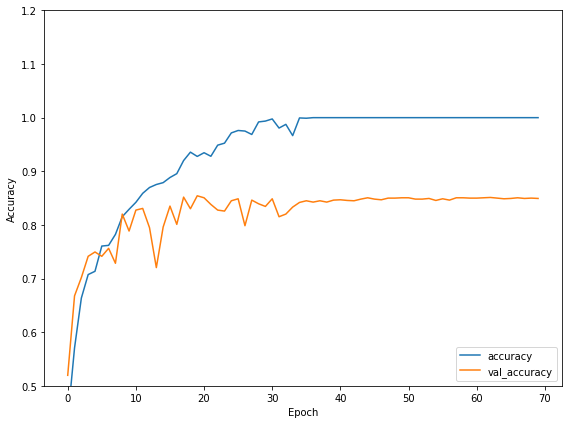

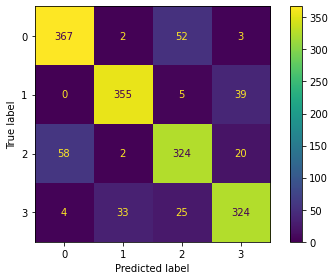

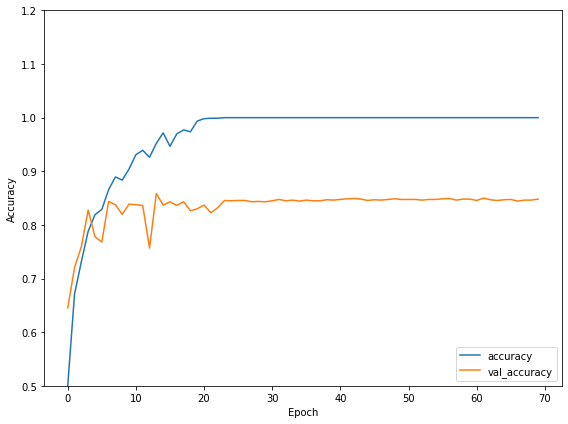

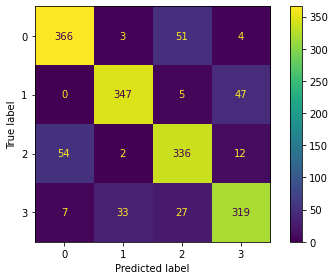

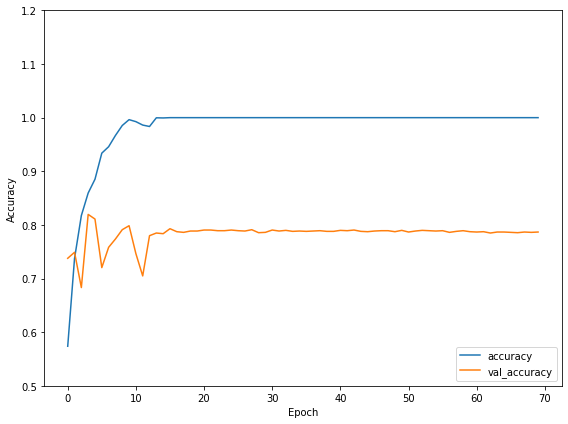

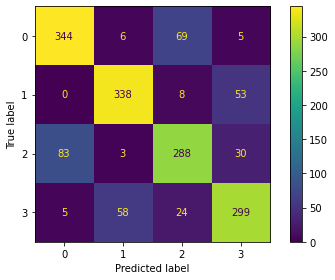

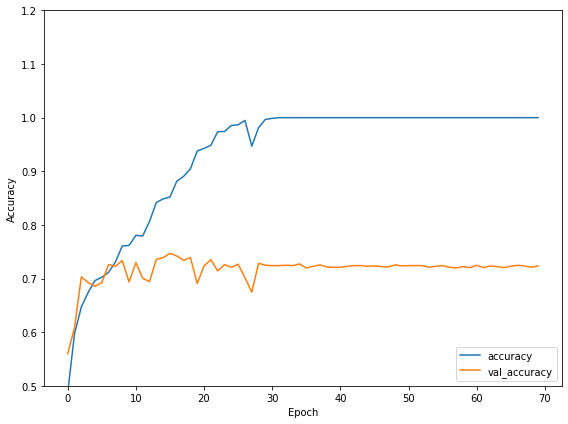

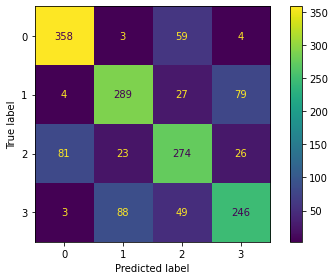

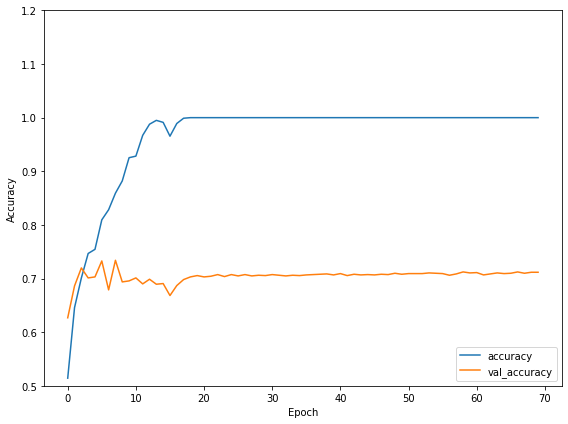

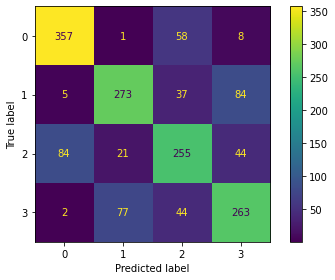

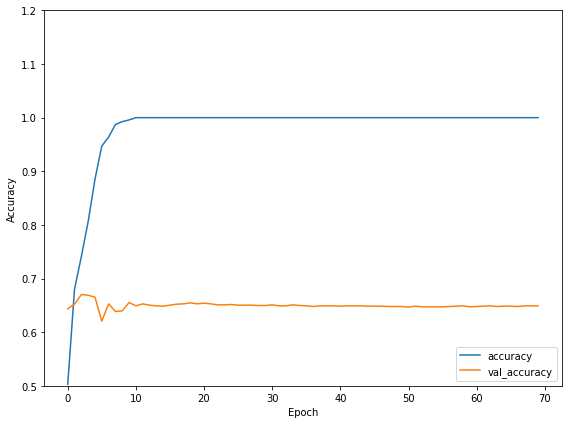

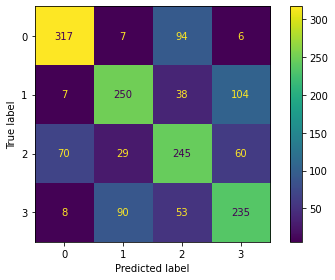

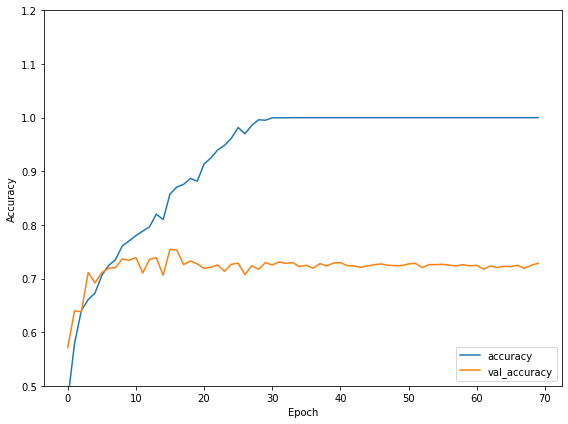

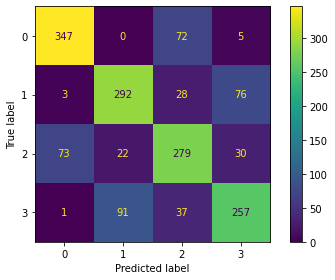

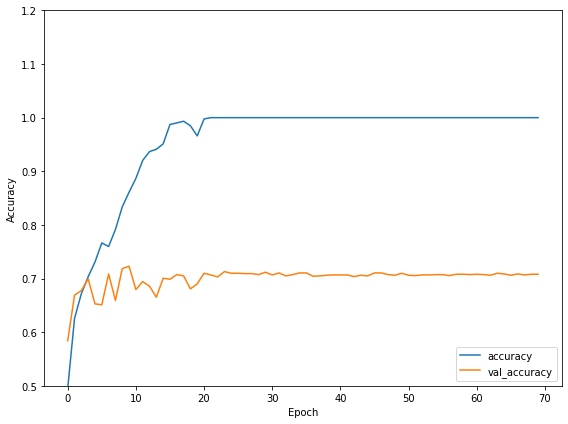

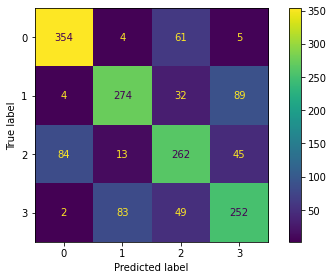

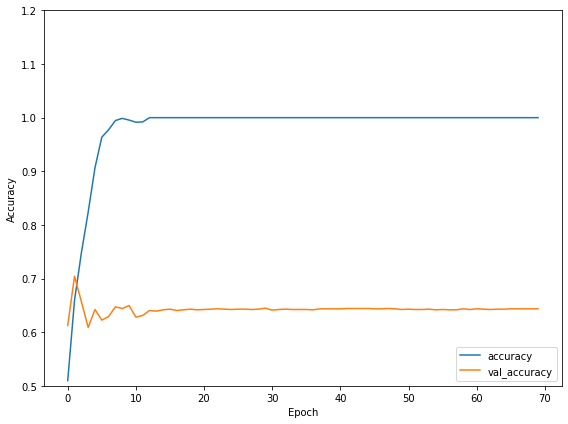

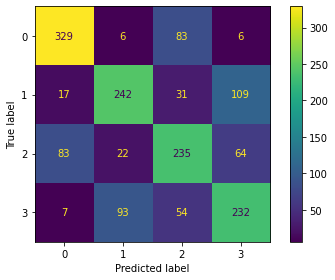

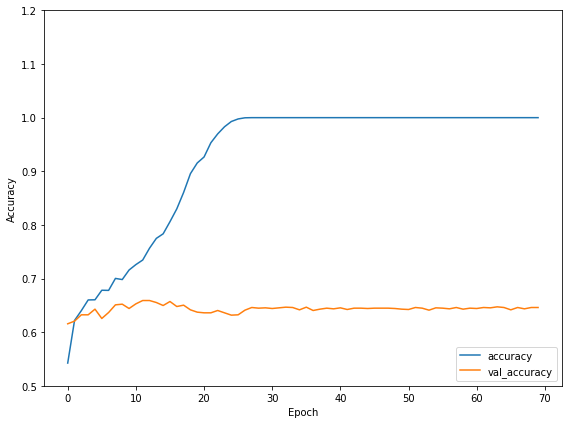

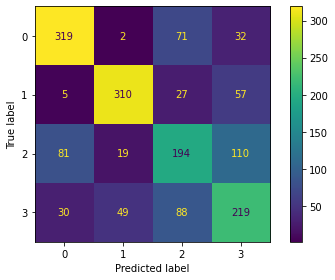

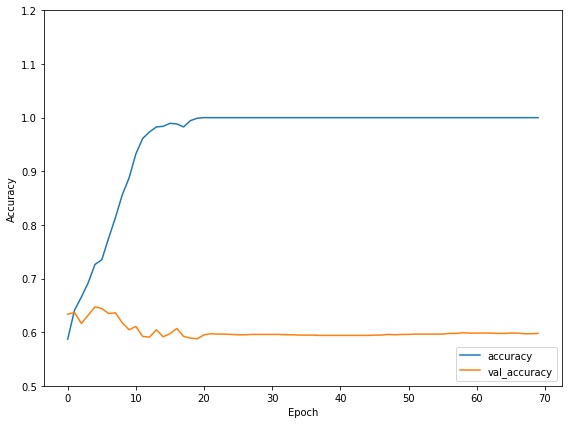

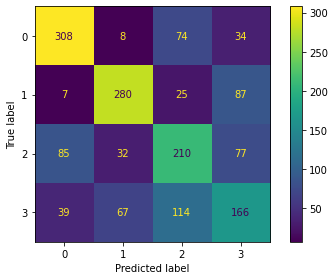

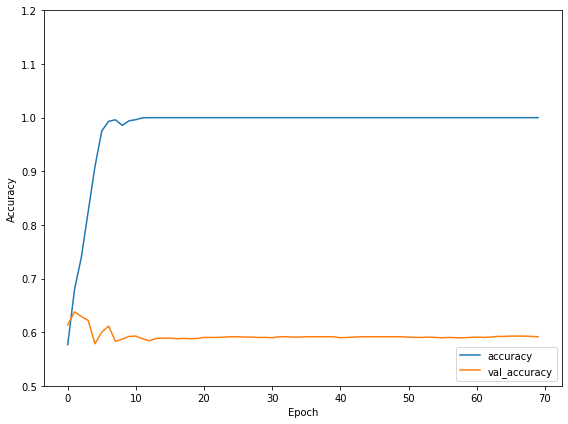

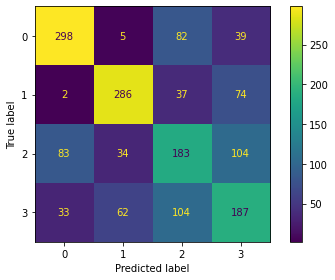

In [ ]:
for date in ["8_18", "9_02", "9_09", "9_20"]:
  for img_size in [32, 64, 128]:
    # load the data
    data = np.load(f'/content/drive/MyDrive/Colab Notebooks/twri_rgb_6832_cotton_{img_size}x{img_size}_{date}.npy')
    labels = pd.read_csv('labels_rgb.csv')
    y_label = labels['class'].values

    # remove the filler type
    new_data_without_filler = np.zeros((5376, img_size, img_size, 3)) # defult was 32,32,3
    new_y_label_without_filler = np.zeros(5376, dtype=int)
    i = 0
    for idx, val in enumerate(y_label):
      if val != 0:
        new_data_without_filler[i] = data[idx]
        new_y_label_without_filler[i] = y_label[idx]
        i+=1
    data = new_data_without_filler
    y_label = new_y_label_without_filler - 1

    # Morphology image processing keep the cotton only

    for i in range(len(data)):
      # convert the rgb to lab color space
      image = data[i]/255.0
      gray_image = rgb2lab(image)
      gray_image = gray_image[:,:,1]

      # use otsu's method to get a rough mask image
      val = skimage.filters.threshold_otsu(gray_image)
      mask = gray_image > val

      #t = 0.5
      footprint = disk(2)
      #mask = closing(mask, footprint)
      #footprint = disk(3)
      mask = opening(mask, footprint)
      mask = dilation(mask, disk(1))

      #fig, ax = plt.subplots()
      #plt.imshow(binary_mask, cmap="gray")

      selection = image.copy()
      selection[mask] = 0
      data[i] = selection

    # split the data and normalization
    train_images, test_images, train_labels, test_labels = train_test_split(data, y_label, test_size=0.3, random_state=42)
    #train_images, test_images = train_images / 255.0, test_images / 255.0
    class_names = ['rainfed', 'fully irrigated', 'percent deficit', 'time delay']

    # set up the model and train
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(4))
    # model.summary()
    # compile the model
    model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=70,
                      validation_data=(test_images, test_labels))

    # plot and save the image
    plt.figure(figsize=(8,6))
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1.2])
    plt.legend(loc='lower right')
    save_fig(f"Morphology Training and validation accuracy for {img_size} x {img_size} at {date} with four classes")


    test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
    probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
    predictions = probability_model.predict(test_images)
    pred = np.argmax(predictions, axis=1)

    # save the confusion matrix image
    tf.math.confusion_matrix(test_labels, pred)
    ConfusionMatrixDisplay.from_predictions(test_labels, pred)
    save_fig(f"Morphology Confusion matrix for {img_size} x {img_size} at {date} with four classes")

    # save the precision and recall information to .txt files

    precision_recall_fscore_support(test_labels, pred, labels=[0, 1])
    #target_names = ['class 0', 'class 1', 'class 2', 'class 3']
    target_names = ['rainfed', 'fully irrigated', 'percent deficit', 'time delay']
    print(classification_report(test_labels, pred, target_names=target_names))
    report = classification_report(test_labels, pred, target_names=target_names)
    report_path = f"Morphology Precision and Recall for {img_size} x {img_size} at {date} with four classes.txt"
    text_file = open(report_path, "w")
    n = text_file.write(report)
    text_file.close()




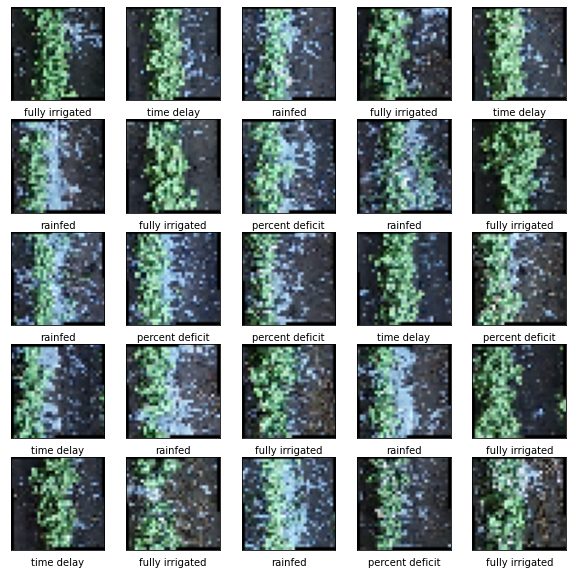

In [ ]:
class_names = ['rainfed', 'fully irrigated', 'percent deficit', 'time delay'] # , 'time delay'
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i]])
plt.show()

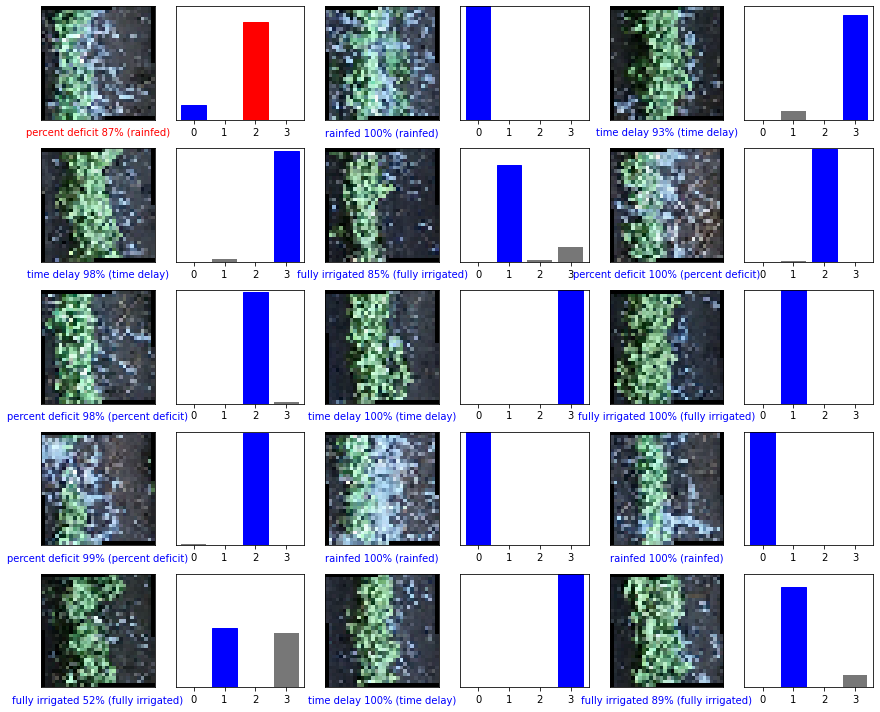

In [ ]:

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i],  test_labels)
plt.tight_layout()
plt.show()

In [ ]:
# y_label[y_label == 3] = 2
# y_label[y_label == 2] = 0
# y_label

In [ ]:
# from collections import Counter
# Counter(y_label)

In [ ]:
#data.shape

In [ ]:
#plt.imshow(data[0]/255.0)

In [ ]:
# The skimage library has several different methods of thresholding
import numpy as np
import glob
import matplotlib.pyplot as plt
import skimage.color
import skimage.filters


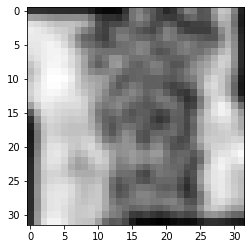

In [ ]:
image = data[0]/255.0
gray_image = skimage.color.rgb2gray(image)

# blur the image to denoise
blurred_image = skimage.filters.gaussian(gray_image, sigma=1.0)

fig, ax = plt.subplots()
plt.imshow(blurred_image, cmap="gray")

(0.0, 1.0)

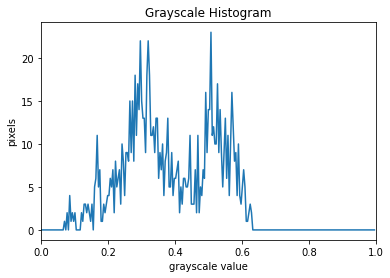

In [ ]:
# create a histogram of the blurred grayscale image
histogram, bin_edges = np.histogram(blurred_image, bins=256, range=(0.0, 1.0))

fig, ax = plt.subplots()
plt.plot(bin_edges[0:-1], histogram)
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim(0, 1.0)

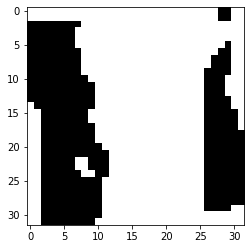

In [ ]:
t = 0.45
binary_mask = blurred_image < t

fig, ax = plt.subplots()
plt.imshow(binary_mask, cmap="gray")

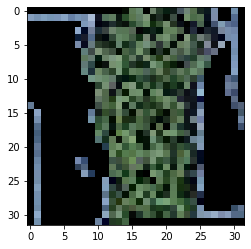

In [ ]:
# automatic thresholding, which uses a quantitative, mathematical definition for a good threshold that allows us to determine the value of t automatically.
selection = image.copy()
selection[~binary_mask] = 0

fig, ax = plt.subplots()
plt.imshow(selection)

(0.0, 1.0)

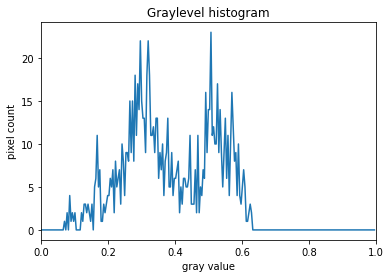

In [ ]:
len(data)

5376

In [ ]:
for i in range(len(data)):
  image = data[i]/255.0
  gray_image = skimage.color.rgb2gray(image)

  # blur the image to denoise
  blurred_image = skimage.filters.gaussian(gray_image, sigma=1.0)

  #t = 0.5
  t = skimage.filters.threshold_otsu(blurred_image)
  binary_mask = blurred_image < t

  #fig, ax = plt.subplots()
  #plt.imshow(binary_mask, cmap="gray")

  selection = image.copy()
  selection[~binary_mask] = 0
  data[i] = selection


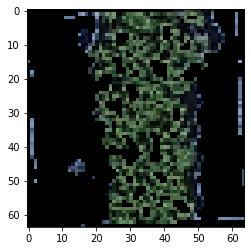

In [ ]:
plt.imshow(data[0])

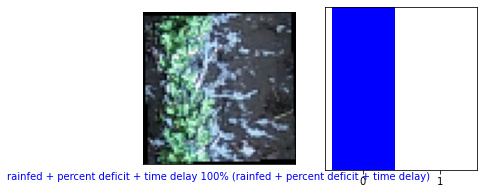

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

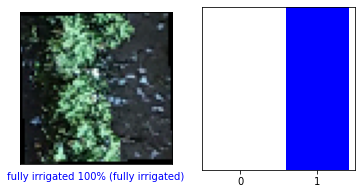

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()